## Perceptron

### data generation

In [135]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

m = 100
v1 = 8*np.random.rand(m, 1)
v2 = 7*np.random.rand(m, 1) -4

h = 0.8*v1 + v2 -3

In [136]:
C1 = np.where(h>=1)[0] # returns the index
C0 = np.where(h<-1)[0]

x1 = v1[C1]
y1 = v2[C1]
x2 = v1[C0]
y2 = v2[C0]

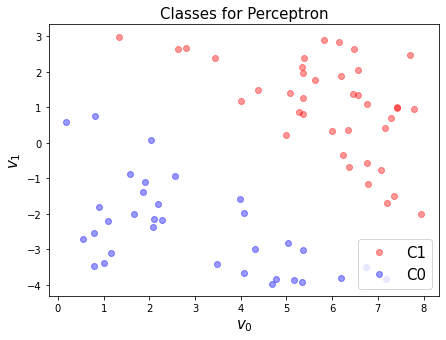

In [137]:
plt.figure(figsize=(7, 5))
plt.plot(x1, y1, 'ro', alpha=0.4, label = 'C1')
plt.plot(x2, y2, 'bo', alpha=0.4, label='C0')
plt.legend(loc = 4, fontsize = 15)
plt.title('Classes for Perceptron', fontsize=15)
plt.xlabel(r'$v_0$', fontsize=15)
plt.ylabel(r'$v_1$', fontsize=15)
plt.show()

## Perceptron

$\sum_{i=1}^{d}w_{i}x_i > threshold$ <br>
$\sum_{i=1}^{d}w_{i}x_i < threshold$ <br><br>

$h(x) = sign((\sum_{i=1}^{d}w_{i}x_i) - threshold) = sign((\sum_{i=1}^{d}w_{i}x_i) + w_0)$ <br><br>

$x_0 = 1$, 
$h(x) = sign(w^Tx)$

## meaning of w vector

+ ***hyperplane*** linearly separates the data into half.
+ ***w*** vector is orthogonal to any vecotr lying on the hyperplane<br><br>
proof)<br>
if $\vec{p}$ and $\vec{q}$ are on the hyperplane.<br>
then, $g(\vec{p})=g(\vec{q})=0$ <br>
$\Rightarrow w_0 + w^T\vec{p} = w_0 + w^T\vec{q} = 0$<br>
$\Rightarrow w^T(\vec{p} - \vec{q}) = 0$ <br>
$\therefore w$ is orthogonal to the line.



## perceptron algorithm
+ as mentioned above, $h(x) = sign(w^Tx)$
+ if $sign(w^Tx_n)\neq y_n$, ***update $w\leftarrow w + y_nx_n$***
+ repeat the update until there's no misclassified $(x,y)$

$h(x) = w^Tx = w_0 + w_1x_1 + w_2x_2$ <br><br><br>
$
w = \begin{bmatrix}w_0\\w_1\\w_2 \end{bmatrix}
$

$
x = 
\begin{bmatrix}
1&x_1^{(1)} & x_2^{(1)} \\
1&x_1^{(2)} & x_2^{(2)} \\
1&x_1^{(3)} & x_2^{(3)} \\
\vdots & \vdots & \vdots\\
1&x_1^{(m)} & x_2^{(m)} \\
\end{bmatrix}
$

$
y =
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
y^{(3)}\\
\vdots \\
y^{(m)}\\
\end{bmatrix}
$

In [150]:
X1 = np.hstack([np.ones([x1.shape[0], 1]), x1, y1]) #Class1 data
X2 = np.hstack([np.ones([x2.shape[0], 1]), x2, y2]) #Class0 data

X = np.vstack([X1, X2])
y = np.vstack([np.ones([x1.shape[0], 1]), -np.ones([x2.shape[0], 1])]) # 1 for C1, -1 for C0
w = np.ones([3, 1]) # random value for initial w

print(X1.shape)
print(X2.shape)
print(X.shape)
print(y.shape)

(39, 3)
(33, 3)
(72, 3)
(72, 1)


In [159]:
X = np.asmatrix(X)
y = np.asmatrix(y)
w = np.asmatrix(w)

### iteration for w

In [160]:
m = y.shape[0]
for i in range(100):
    for j in range(m):
        if y[j,0] != np.sign(X[j, :]*w)[0,0]:
            w += y[j, 0]*X[j, :].T
            
w

matrix([[-15.        ],
        [  5.77069658],
        [ 12.61403131]])

$h(x) = w_0+w_1x_1+w_2x_2 = 0$  <br>
$\Rightarrow x_2 = -\frac{w_1}{w_2}x_1 - \frac{w_0}{w_2}$

In [161]:
px = np.linspace(0, 8, 100).reshape(-1, 1)
py = -w[1,0]/w[2,0]*px - w[0,0]/w[2,0]

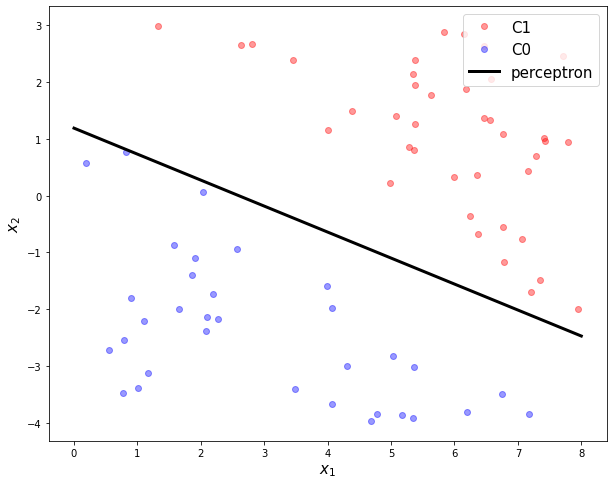

In [162]:
plt.figure(figsize=(10,8))
plt.plot(x1, y1, 'ro', alpha = 0.4, label = 'C1')
plt.plot(x2, y2, 'bo', alpha = 0.4, label = 'C0')
plt.plot(px, py, c='k', linewidth=3, label = 'perceptron')

plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize=15)
plt.show()

In [163]:
loss = 0

for i in range(m):
    loss += max(0, -y[i,0]*(X[i,:]*w))

In [165]:
loss

0